# <center> Homework 1 </center>
## <center> Kishore Narendran | 14644574 | narendrk@uci.edu</center>

### Problem 1 - Python and Data Exploration 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns

In [3]:
# (a) Displaying the number of features and data points
print 'Number of features\t=\t', X.shape[1]
print 'Number of data points\t=\t', X.shape[0]

Number of features	=	4
Number of data points	=	148


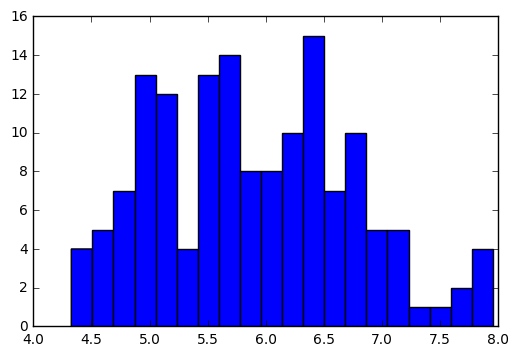

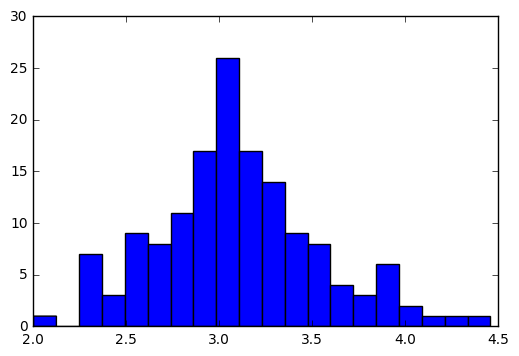

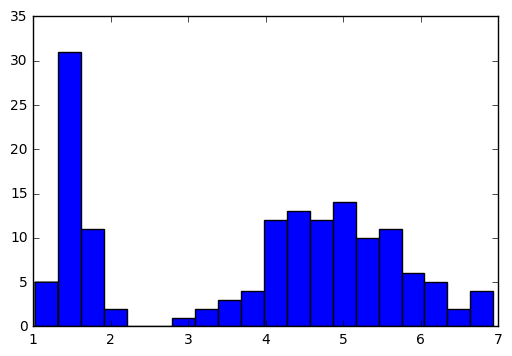

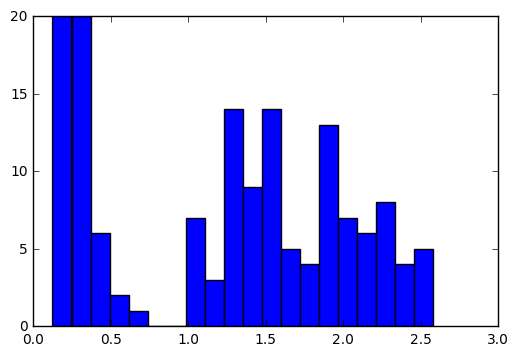

In [4]:
# (b) Displaying the histogram for each feature, with 20 bins
bins = 20 # Change the number of bins in the histogram here
for i in range(0,X.shape[1]):
    plt.hist(X[:,i], bins)
    plt.show()

In [5]:
# (c) Computing the mean value of each feature
mean = np.mean(X, axis=0) # Computes the mean along every feature
print 'Mean value of features\t=\t', mean

Mean value of features	=	[ 5.90010376  3.09893092  3.81955484  1.25255548]


In [6]:
# (d) Computing the variance and standard deviation of each feature
std = np.std(X, axis=0) # Computes the standard deviation along every feature
print 'Standard Deviation of features\t=\t', std
variance = np.var(X, axis = 0) # Computes the variance along every feature
print 'Variance of features\t=\t', variance

Standard Deviation of features	=	[ 0.83340207  0.43629184  1.75405711  0.75877246]
Variance of features	=	[ 0.694559    0.19035057  3.07671634  0.57573564]


In [7]:
# (e) Normalizing the features by subtracting their mean and dividing by its
#       standard deviation

normFeatures = (X[:,:] - mean)/std
print 'Mean of normalized features\t=\t', np.mean(normFeatures, axis=0)
print 'Variance of normalized features\t=\t', np.var(normFeatures, axis=0)

Mean of normalized features	=	[  2.31421489e-15   9.27186256e-16  -4.67343881e-16   7.83157323e-16]
Variance of normalized features	=	[ 1.  1.  1.  1.]


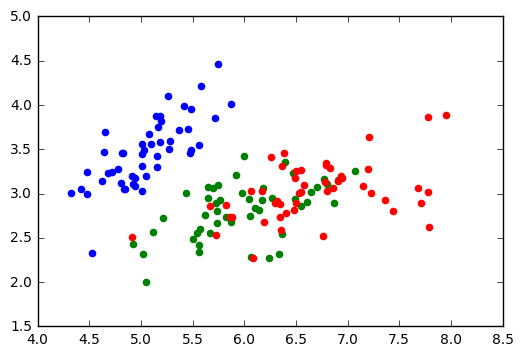

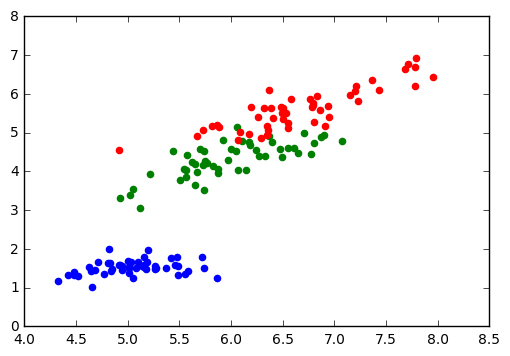

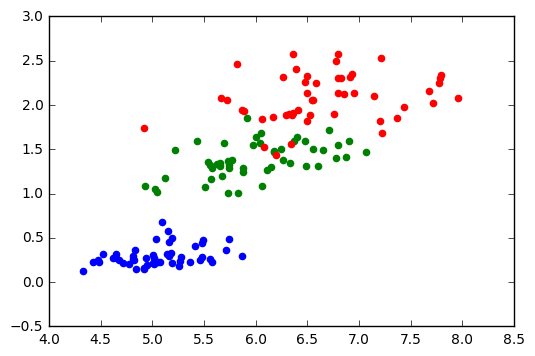

In [8]:
# (f) Scatter plot for pair of features - (1,2) (1,3) (1,4)
colors = ['b','g','r']
for i in range(1,4):
    for c in np.unique(Y): # Iterates through every unique label
        plt.scatter( X[Y==c,0], X[Y==c,i], color=colors[int(c)])
    plt.show()

### Problem 2 - kNN Predictions

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns

In [10]:
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y, 0.75); # split data into 75/25 train/test

mltools/utils.py:194: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Xtr,Xte = X[:ne,:], X[ne:,:]
mltools/utils.py:202: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Ytr,Yte = Y[:ne], Y[ne:]


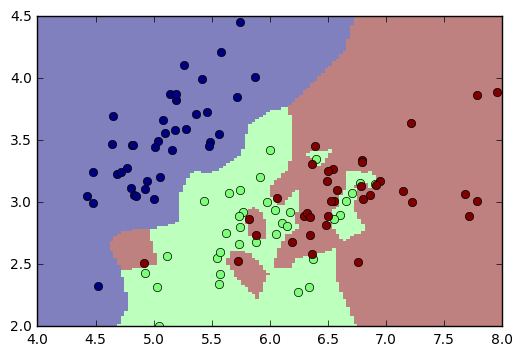

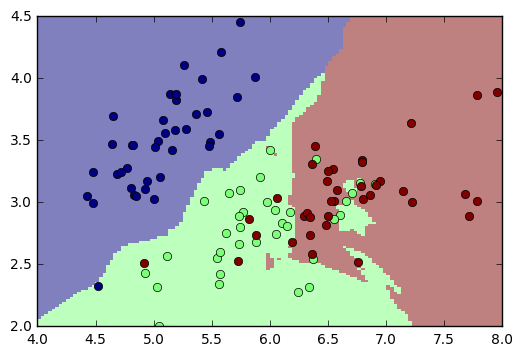

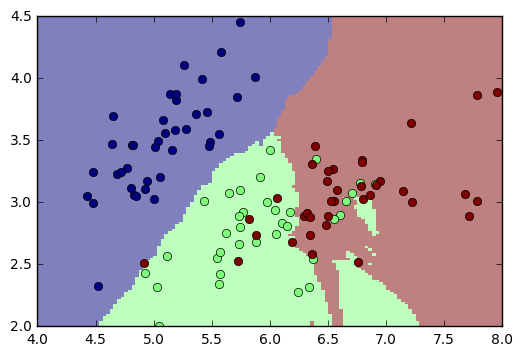

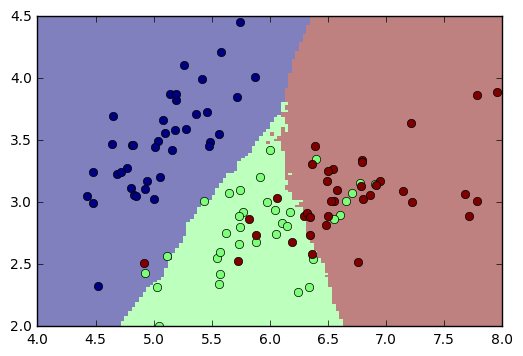

In [11]:
# (a) Plotting classification boundary for two features in the iris dataset
K = [1, 5, 10, 50]
for i in K:
    knn = ml.knn.knnClassify()
    knn.train(Xtr[:,0:2], Ytr, i)
    ml.plotClassify2D(knn, Xtr[:,0:2], Ytr)
    plt.show()

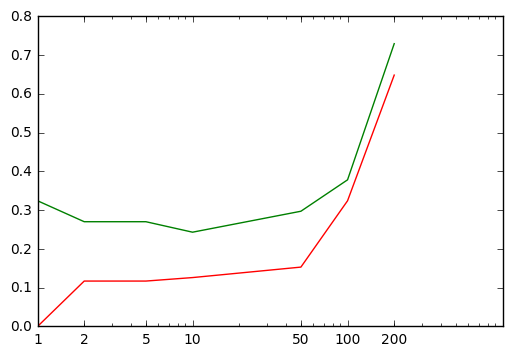

In [12]:
# (b) Computing the error rate for the training data and testing data once having
#    trained a kNN classifier, and printing the error rate vs k graph
K = [1, 2, 5, 10, 50, 100, 200]
errTrain = []
errTest = []
for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(Xtr[:,0:2], Ytr, k)
    YTrainPred = learner.predict(Xtr[:,0:2])
    errTrain.append(float(np.sum(YTrainPred != Ytr))/float(Xtr.shape[0]))

    YTestPred = learner.predict(Xte[:,0:2])
    errTest.append(float(np.sum(YTestPred != Yte))/float(Xte.shape[0]))

plt.semilogx(K, errTrain, color='r')
plt.semilogx(K, errTest, color='g')
plt.xticks(K, K)
plt.show()

Based on the above plot of error rates for predicting test data and training data after training the kNN classifier, it is intuitive to pick the k value for which the test data produced the least error. From the above plot, that <strong><em> optimal k value is 10</em></strong>. Hence, this kNN classifier will work best on the first two features of the iris data set if a k value of 10 is used. 

### Problem 3 - Bayes Classifiers

###### (a) Compute all the probabilities necessary for a naïve Bayes classier, i.e., the classs probability <em>p(y)</em> and all the individual feature probabilities <em>p(x<sub>i</sub>|y)</em>, for each class  <em>y</em> and each feature <em>x</em>

| i  | P(x<sub>i</sub>=0 &#124; y=1) | P(x<sub>i</sub>=1 &#124; y=1) |P(x<sub>i</sub>=0 &#124; y=-1) | P(x<sub>i</sub>=1 &#124; y=-1) |
|---|---|---|---|---|
|1|1/4|3/4|1/2|1/2|
|2|1|0|1/6|5/6|
|3|1/4|3/4|1/3|2/3|
|4|1/2|1/2|1/6|5/6|
|5|3/4|1/4|2/3|1/3|

| P(y=1) | P(y=-1) |
|---|---|
| 2/5 | 3/5 |

###### (b) Which class would be predicted for <u>x</u> = (0 0 0 0 0)? What about for <u>x</u> = (1 1 0 1 0)?

We compare the probabilities for the two classes y=1 and y=-1 and check which yields a higher probability.<br> 
P(y=1) x P(x<sub>1</sub>=0, x<sub>2</sub>=0, x<sub>3</sub>=0, x<sub>4</sub>=0, x<sub>5</sub>=0  &#124; y=1) < > P(y=-1) x P(x<sub>1</sub>=0, x<sub>2</sub>=0, x<sub>3</sub>=0, x<sub>4</sub>=0, x<sub>5</sub>=0  &#124; y=-1)

Since these features are independent, and as we are simply multiplying the probabilities from the table above, it yields the following result: <br>

0.009375 > 0.00185<br>

From the above probability comparison it is evident that the predicted class for <u>x</u> = (0 0 0 0 0) is <strong><em>y = 1</em></strong>

***

Similarly, we do the same for <u>x</u> = (1 1 0 1 0) in the following manner<bre>

P(y=1) x P(x<sub>1</sub>=1, x<sub>2</sub>=1, x<sub>3</sub>=0, x<sub>4</sub>=1, x<sub>5</sub>=0  &#124; y=1) < > P(y=-1) x P(x<sub>1</sub>=1, x<sub>2</sub>=1, x<sub>3</sub>=0, x<sub>4</sub>=1, x<sub>5</sub>=0  &#124; y=-1)

We use the probabilities in the table above to solve the comparison

0 < 0.07716 <br>

From the above probability comparison it is evident that the predicted class for <u>x</u> = (1 1 0 1 0) is <strong><em>y = -1</em></strong>

##### (c) Computer the posterior probability that y = 1, given observation that  <u>x</u> = (1 1 0 1 0)

The posterior probability expected above is represented as P(y=1 &#124; x<sub>1</sub>=0, x<sub>2</sub>=0, x<sub>3</sub>=0, x<sub>4</sub>=0, x<sub>5</sub>=0). And by utilizing the probabilities given in the table, the resulting posterior probability is <strong><em>0</em></strong>.

##### (c) Why should we probably not use a joint Bayes classier (using the joint probability of the features x, as opposed to a naïve Bayes classier) for these data?

We should probably not use a joint Bayes classifier because the combination of probabilities is far higher, we have to calculate 2^5 probability combinations for y = 1. As opposed to only 20 direct probabilities that we need from the table currently. Hence, when using joint Bayes we need to calculate many more probablity combinations. Moreover, these features seem indpendent and hence joint probablities don't really make sense. 

##### (d) Suppose that, before we make our predictions, we lose access to my address book, so that we cannot tell whether the email author is known. Should we re-train the model, and if so, how? (e.g.: how does the model, and its parameters, change in this new situation?) Hint: what will the naïve Bayes model over only features x 2 . . . x 5 look like, and what will its parameters be?

This model does not require re-training. Because, in Naive-Bayes the probabilities for the features are calculated and stored independently. Which means omitting a feature is essentially just removing the probabilities of the features. Subsequently, the model needs one lesser input probability for making predictions. The parameters will hence be P(x<sub>i</sub>=0 &#124; y=1), P(x<sub>i</sub>=1 &#124; y=1), P(x<sub>i</sub>=0 &#124; y=-1), P(x<sub>i</sub>=1 &#124; y=-1) for i in [2,5]. All the other probabilities will remain the same on omission of the first feature.